# Week 7: Support Vector Machines

# Setting the Scene

In this exercise, we'll be using support vector machines ("<b>SVMs</b>") to build a spam classifier.  This is split into three parts:

1. SVM on one 2D linearly separable dataset;


2. SVM on two 2D non-linearly separable datasets; and


3. Pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

# Part 1 - Linear Classification SVM
---------

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of $C$ (similar to the regularization term in linear/logistic regression). 

# Step 1 - Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline


# Step 2 - Load Data

In [2]:
raw_data = loadmat('ex6data1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2

# Step 3 - Visualise the Data

We'll visualize it as a scatter plot where the class label is denoted by a symbol (+ for positive, o for negative).

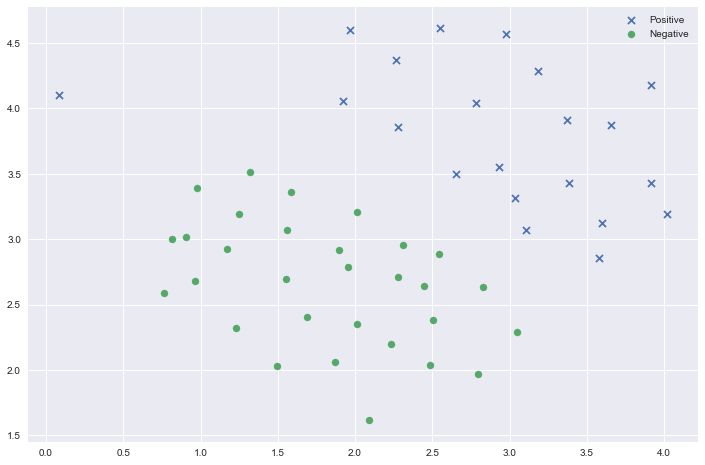

In [3]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

Notice that there is one outlier positive example that sits apart from the others, i.e. top left corner.  

This means that the classes are still linearly separable but it's a very tight fit.  

We're going to train a linear support vector machine to learn the class boundary.  

# Step 4 - Implementing SVM

In this exercise we're not tasked with implementing an SVM from scratch, and indeed in the lecture materials the maths and full implementation is not fully explained.  

As such we will use the one built into scikit-learn.

In [4]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

# Step 5 - Experiment with $C$ values

Recall that:

* $C$ is a positive value that controls the penalty for misclassified training examples.


* $C$ plays a similar role to $\frac{1}{\lambda}$ where $\lambda$ is the regularisation parameter we were using in logistic regression.

## (a) Experiment 1: $C = 1$

For the first experiment we'll use $C = 1$, per the above code `svm.LinearSVC(C=1, loss='hinge', max_iter=1000)` used to set up scikit-learn's SVM module.

Let's see how it performs by using `.score`, which returns the mean accuracy on the given test data and labels:

In [5]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

## (b) Experiment 2: $C = 100$

It appears that it mis-classified the outlier.  Let's see what happens with a larger value of C, again using `.score`:

In [6]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  

## (c) Visualising Confidence Levels for Different $C$ Values

We can visualize that the decision boundary is no longer a natural fit by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

### (i) Visualising when $C = 1$

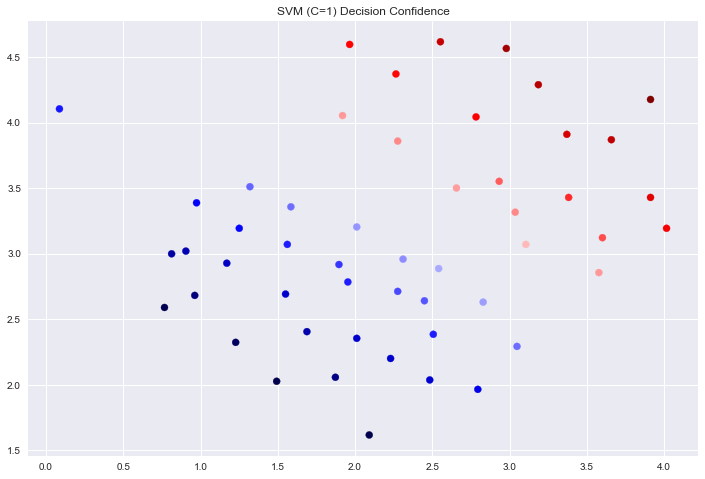

In [7]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

### (ii) Visualising when $C = 100$

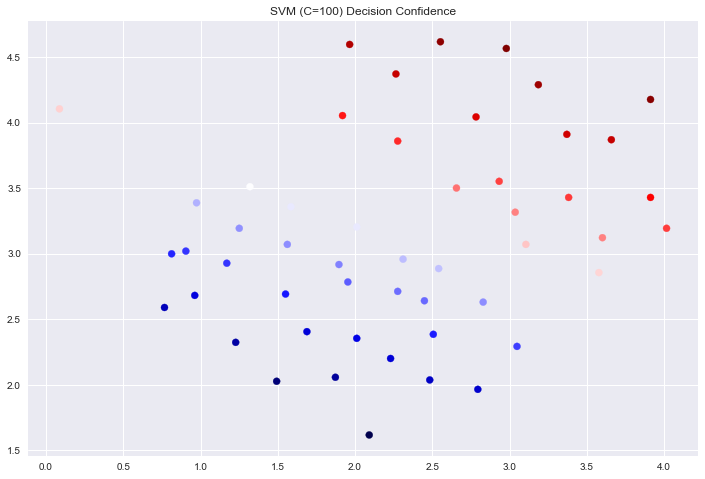

In [8]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

### (iii) Analysing the Above

The difference is a bit subtle but look at the color of the points near the boundary.  

At this point in my learning I'm not knowledgeable enough to plot the decision boundaries (I'll learn eventually!)... however, from the exercise text these look as follows:

<p align = "center">
<img src="..\Images\SVMEx.PNG" width="80%"/>
</p>


It's easy to see from these graphs the point made above, i.e. that the more accurate classifier no longer naturally fits the data.

# Part 2 - Non-Linear SVM with Gaussian Kernels
-----

Now we're going to move from a <b>linear</b> classification SVM to one that's capable of <b>non-linear</b> classification using kernels.  

# Step 1 - Defining the Gaussian Kernel Function

We're first tasked with implementing a <b>gaussian</b> kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

Recall that:

* A gaussian kernel is a similarity function measuring the "distance" between a pair of examples, ($x^{(i)}, x^{(j)})$.  The gaussian kernel is itself parameterised by a bandwidth parameters, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.


* The gaussian kernel is defined as:

<p align = "center">
<img src="..\Images\GaussianKernel.PNG" width="60%"/>
</p>


In [9]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [12]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

That result matches the expected value from the exercise.  

Next we're going to examine two further data sets, this time each with a non-linear decision boundary.

# Step 2 - Dataset 2

## (a) Load Dataset 2

In [18]:
raw_data = loadmat('ex6data2.mat')

## (b) Plot Dataset 2

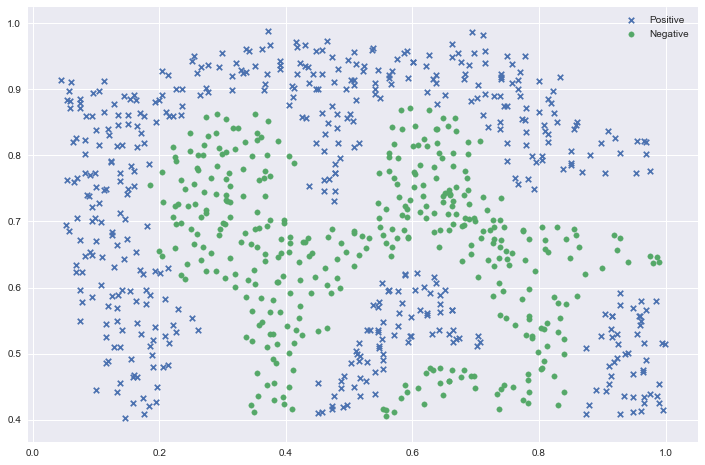

In [19]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

## (c) Build SVM

For this data set we'll build a SVM classifier using the built-in RBF kernel and examine its accuracy on the training data.  

In [20]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## (d) Score SVM

In [21]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

## (e) Visualise Decision Boundary

To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right:

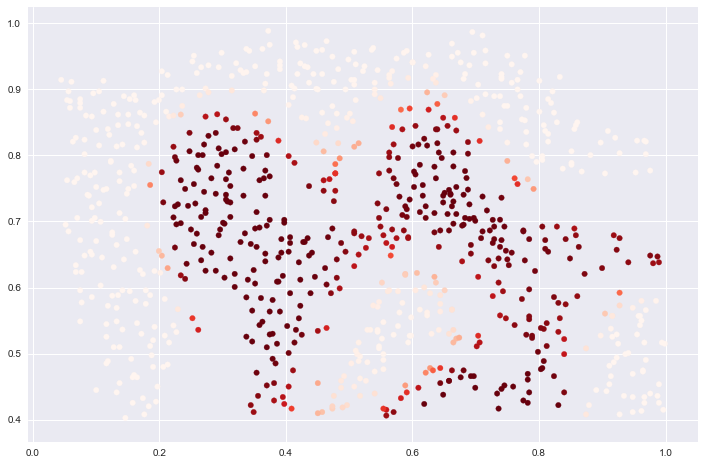

In [22]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')

Notice that the decision boundary generated is <b>non-linear</b>, i.e. a wiggly line that winds between the two classes (the red points and the white points).

# Step 3 - Dataset 3

For the third data set we're given both training and validation sets and tasked with finding optimal hyper-parameters for an SVM model based on validation set performance.  

Although we could use scikit-learn's built-in grid search to do this quite easily, in the spirit of following the exercise directions we'll implement a simple grid search from scratch.

## (a) Load Dataset 3

In [ ]:
raw_data = loadmat('ex6data3.mat')

## (b) Plot Dataset 3

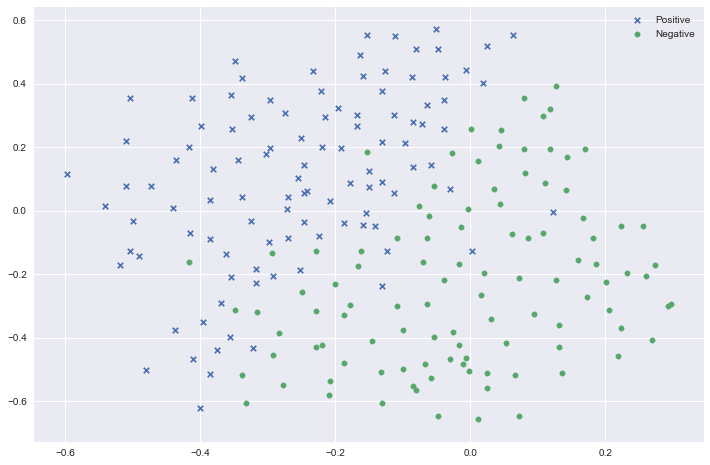

In [24]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

## (c) Determine best $C$ and $\sigma$ parameters

In [23]:
X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

# Part 3 - Spam Classifier

-------

In this part the objective is to use SVMs to build a spam filter.  Note the exercises begin by preprocessing the email data.  Specifically this includes:

1. Lower-casing.


2. Stripping HTML, i.e. removing all HTML tags to leave only the content.


3. Normalizing URLs, e.g. all URLs replaced with the text "httpaddr".


4. Normalizing email addresses, e.g. all email addresses replaced with the text "emailaddr".


5. Normalizing numbers, e.g. all numbers replaced with the text "number".


6. Normalizing dollars and other symbols.


7. Word stemming, reducing words to stemmed forms.  E.g. "discount", "discounts", "discounted" and "discounting" are all reduced to, and replaced by, "discount".


8. Removal of non-words, e.g. punctuation.

From this, a vocab list was generated to determine which words to use in the classifier and those we'd wish to leave out.

The vocab list was chosen using the most frequently occurring words from the dataset, in this case all words occurring more than 100 times resulting in a list of 1899 words.  

Given the vocab list, we can now map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocab list:

<p align = "center">
<img src="..\Images\VocabList.PNG" width="60%"/>
</p>


# Step 1 - Load Data

The parts of the exercise training the SVM spam classifier actually use prepared training and test datasets as follows:

* `spamTrain` containing $4,000$ examples of spam and non-spam emails; and


* `spamTest` containing $1,000$ examples of spam and non-spam emails.

In [27]:
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

# Step 2 - Check Dimensionality

In [28]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

Each document has been converted to a vector with 1,899 dimensions corresponding to the 1,899 words in the vocabulary used in the email dataset.  

The values are binary, indicating the presence or absence of the word in the document.  At this point, training and evaluation are just a matter of fitting the testing the classifer. 

# Step 3 - Train the SVM

In [29]:
svc = svm.SVC()
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 94.4%


This result is with the default parameters.  We could probably get it a bit higher using some parameter tuning, but 95% accuracy still isn't bad.

That concludes exercise 6!  In the next exercise we'll perform clustering and image compression with K-Means and principal component analysis.